# Normalization

- Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Normalization is technique often applied as part of data prepration for machine learning. The goal of Normalization is to change the value of numeric columns in the dataset to use a common scale, without distorting difference in the range of values or loasing information

- Types :
        - Min Max Scaling -----> Most popular
        - Mean Normalization
        - Max absolute 
        - Robust Scaling

#### Min Max Scaling


- formula
        Xi' = (Xi - Xmin)/(Xmax - Xmin)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv('wine_data.csv',header=None, usecols=[0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [3]:
df.shape

(178, 3)

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

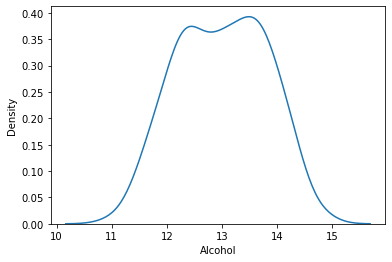

In [4]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

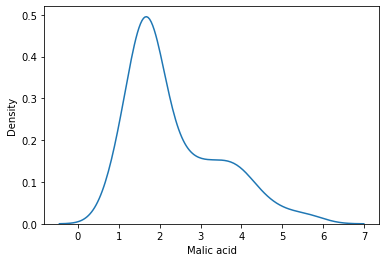

In [5]:
sns.kdeplot(df['Malic acid'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

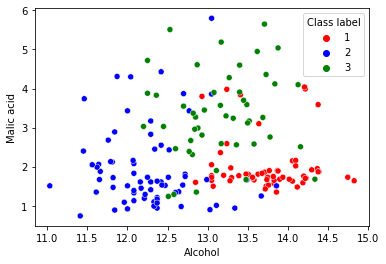

In [6]:
color_dict = {1 : 'red', 3: 'green', 2: 'blue'}
sns.scatterplot(df['Alcohol'], df['Malic acid'], hue= df['Class label'], palette=color_dict)

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split( df.drop('Class label',axis = 1),
                                                 df['Class label'],
                                                 test_size = 0.3,
                                                 random_state = 0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters 
scaler.fit(X_train)

# Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# X_train_scaler is numpy array so just for better visual we tranform it to data frame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [10]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [11]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


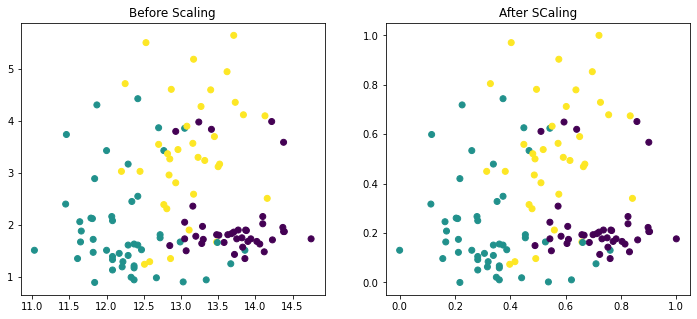

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'], c= y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], c = y_train)
ax2.set_title("After SCaling")
plt.show()

- both scatter plot looks same bcz we just pushed or squize all data in square of side lenght 1 unit 

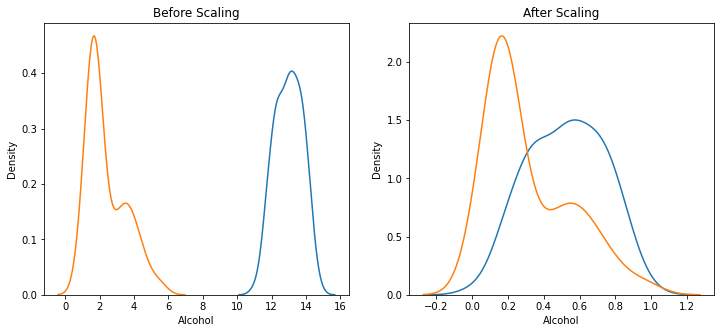

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax = ax1)
sns.kdeplot(X_train['Malic acid'], ax =ax1)

# After scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax = ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax =ax2)
plt.show()


# blue line is Alcohol and orange is Malic acid

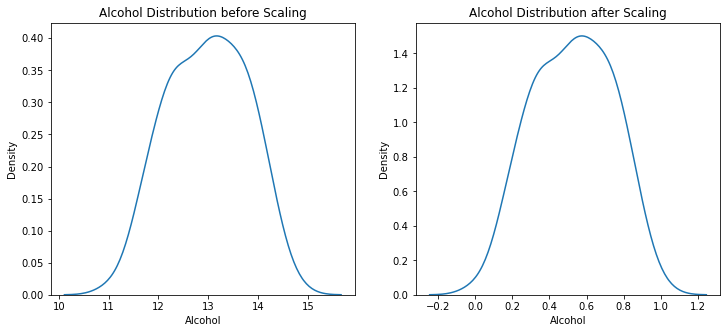

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))

# before scaling
ax1.set_title('Alcohol Distribution before Scaling')
sns.kdeplot(X_train['Alcohol'], ax = ax1)

# After scaling
ax2.set_title('Alcohol Distribution after Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax = ax2)
plt.show()

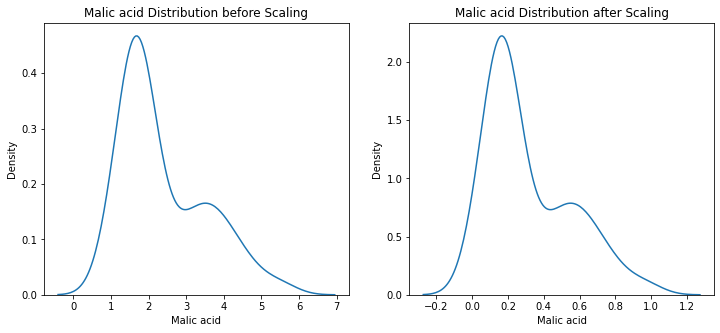

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (12,5))

# before scaling
ax1.set_title('Malic acid Distribution before Scaling')
sns.kdeplot(X_train['Malic acid'], ax = ax1)

# After scaling
ax2.set_title('Malic acid Distribution after Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax = ax2)
plt.show()

#### Mean Normalization


- formula
        Xi' = (Xi - Xmean)/(Xmax - Xmin)

#### Max absolute 

- formula
        Xi' = Xi/|Xmax|
        
- good for data where too many zeros are present

#### Robust Scaling

- formula
        Xi' = (Xi - Xmedian)/(IQR)
        
        where IQR  = Q3 - Q1
        
- good if there are many outliers in data or bascial this is good to deal with outliers

______________________________________________________________________________________________________________________________


- Normalization is good to use when the distribution of data does not follow a Gaussian distribution. It can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors. In Neural Networks algorithm that require data on a 0–1 scale, normalization is an essential pre-processing step. Another popular example of data normalization is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range).



- Standardization can be helpful in cases where the data follows a Gaussian distribution. Though this does not have to be necessarily true. Since standardization does not have a bounding range, so, even if there are outliers in the data, they will not be affected by standardization. In clustering analyses, standardization comes in handy to compare similarities between features based on certain distance measures. Another prominent example is the Principal Component Analysis, where we usually prefer standardization over Min-Max scaling since we are interested in the components that maximize the variance.


- There are some points which can be considered while deciding whether we need Standardization or Normalization


- Standardization may be used when data represent Gaussian Distribution, while Normalization is great with Non-Gaussian Distribution


- Impact of Outliers is very high in Normalization


- To conclude, you can always start by fitting your model to raw, normalized, and standardized data and compare the performance for the best results.
